# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df["danceability"] = df["danceability_%"] / 100
df["energy"] = df["energy_%"] / 100
df["speechiness"] = df["speechiness_%"] / 100
df["acousticness"] = df["acousticness_%"] / 100


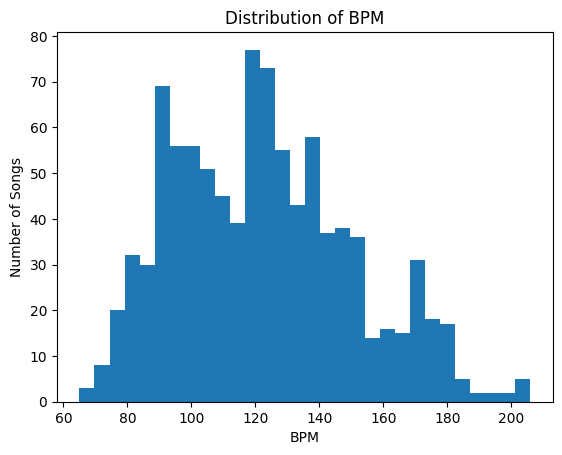

In [2]:
plt.hist(df["bpm"], bins=30)
plt.title("Distribution of BPM")
plt.xlabel("BPM")
plt.ylabel("Number of Songs")
plt.show()


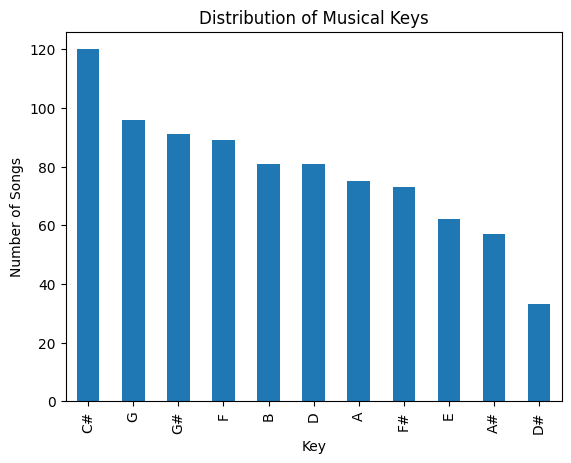

In [3]:
df["key"].value_counts().plot(kind="bar")
plt.title("Distribution of Musical Keys")
plt.xlabel("Key")
plt.ylabel("Number of Songs")
plt.show()


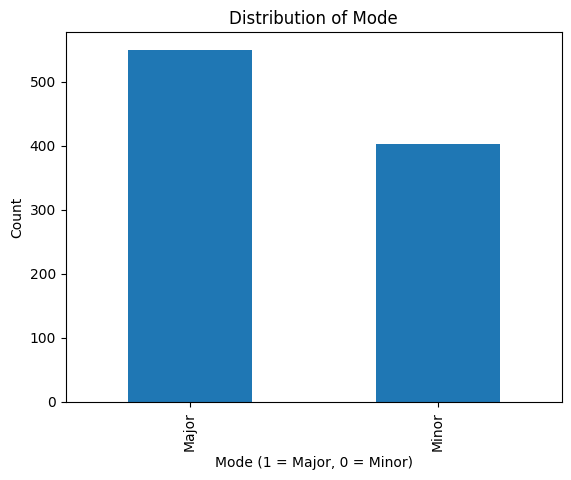

In [6]:
df["mode"].value_counts().plot(kind="bar")
plt.title("Distribution of Mode")
plt.xlabel("Mode (1 = Major, 0 = Minor)")
plt.ylabel("Count")
plt.show()


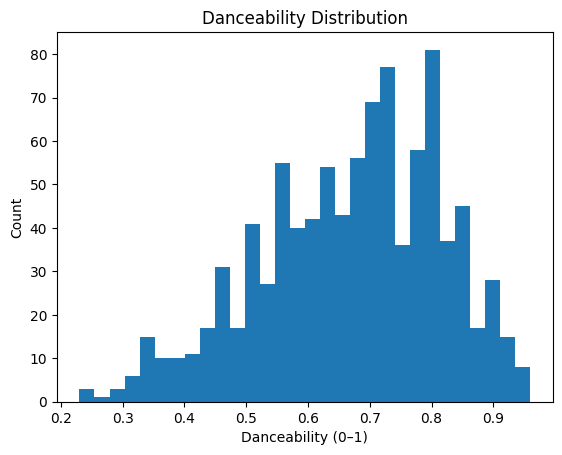

In [7]:
plt.hist(df["danceability"], bins=30)
plt.title("Danceability Distribution")
plt.xlabel("Danceability (0–1)")
plt.ylabel("Count")
plt.show()


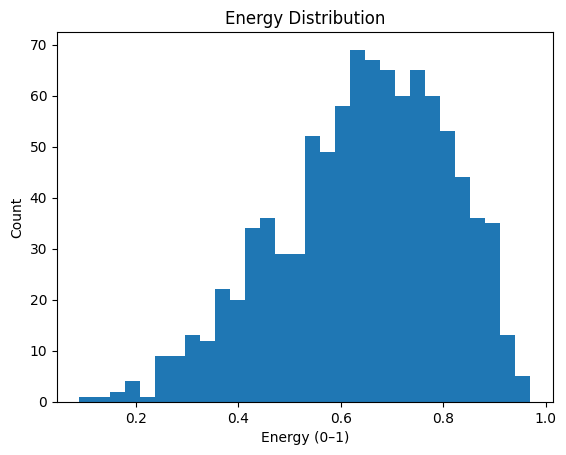

In [8]:
plt.hist(df["energy"], bins=30)
plt.title("Energy Distribution")
plt.xlabel("Energy (0–1)")
plt.ylabel("Count")
plt.show()


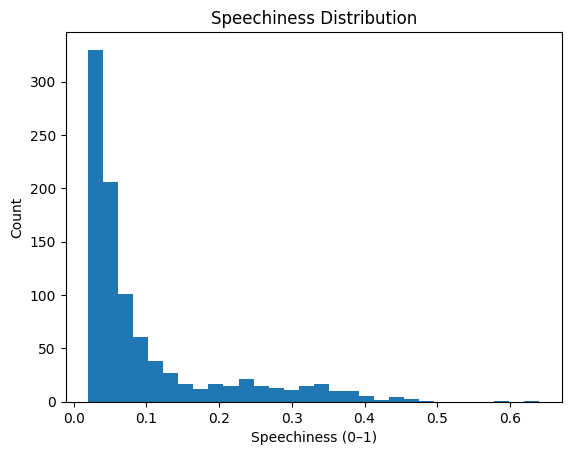

In [9]:
plt.hist(df["speechiness"], bins=30)
plt.title("Speechiness Distribution")
plt.xlabel("Speechiness (0–1)")
plt.ylabel("Count")
plt.show()


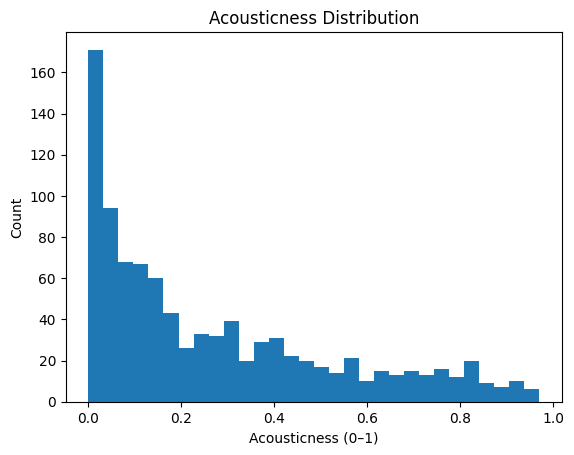

In [10]:
plt.hist(df["acousticness"], bins=30)
plt.title("Acousticness Distribution")
plt.xlabel("Acousticness (0–1)")
plt.ylabel("Count")
plt.show()


In [11]:
smash_hits = df[
    (df["bpm"].between(120, 130)) &
    (df["mode"] == 1) &
    (df["danceability"].between(0.65, 0.80)) &
    (df["energy"].between(0.65, 0.85)) &
    (df["speechiness"].between(0.03, 0.12)) &
    (df["acousticness"].between(0.00, 0.30))
]


In [12]:
smash_hits[["track_name", "artist(s)_name", "streams"]].head(10)
smash_hits.sort_values("streams", ascending=False).head(5)
df[df["track_name"].str.contains("Blinding Lights", case=False, na=False)][
    ["track_name", "artist(s)_name", "bpm", "danceability", "energy", "speechiness", "acousticness"]
]


,track_name,artist(s)_name,bpm,danceability,energy,speechiness,acousticness
55,Blinding Lights,The Weeknd,171,0.5,0.8,0.07,0.0


Using the Spotify 2023 dataset, I analyzed the distributions of BPM, key, mode, danceability, energy, speechiness, and acousticness. The most common values across these features were used to design a “guaranteed smash hit.”

Based on the data, a hit song would most likely have a tempo between 120–130 BPM, be written in a major key, have high danceability and energy, and low speechiness and acousticness. These values consistently appeared most often in the dataset.

Filtering the dataset using these criteria returned several real songs, many of which had very high stream counts, indicating they were genuinely popular.

A known smash hit such as Blinding Lights by The Weeknd closely matches these ranges, supporting the idea that successful songs tend to share similar audio feature profiles.